# **Kelompok 2 IBDA2032 NLP**
- Yosia H. Farianto (10101190478) 
- Khenny F. Suciady (10101200235) 
- Jody N. Imanuel (10101190378) 


### Dalam proyek ini, kami membuat model NLP (Natural Language Processing) untuk melakukan analisa sentimen pada media sosial twitter yang terdiri dari sentimen positif, negative, dan natural. Disini kami akan menetukan kira-kira kata apa yang mewakili setiap sentimen. 

## **Menginstall Library Langdetect**

In [30]:
!pip install langdetect

## **Library-library yang Digunakan**

In [31]:
# Import Libraries
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

## **Mengautentikasi Data yang Diperlukan**

Disini kami menggunakan library tweepy untuk mengakses data dari twitter untuk melakukan sentimen analisis. 

In [32]:
# Authentication
consumerKey =  '398CFhjDeUtvqr5hTst0Mj6Zb'
consumerSecret ='xwBhnGYvyLkWjL3vIShGTSa1dPbWxk28dUxswDiaL6q88v6pJu'
accessToken = '1393937049917399040-onzgrEzq28abboUAGJ49Pq80yCgRlz'
accessTokenSecret =  'Y0vNc4FKtONCgGOQCbYjvKYz9f3kSWVtLBqVFTWh5rVxj'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [33]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
SentimentIntensityAnalyzer().polarity_scores('quite good')

{'compound': 0.4927, 'neg': 0.0, 'neu': 0.238, 'pos': 0.762}

## **Melakukan Sentiment Analysis**

Disini kami menggunakan topik " **covid-19 vaccine is already** ".Kami menggunakan topik ini karena menurut kami topik ini memiliki banyak sekali pro dan kontra. Ada yang mengatakan vaksin berbahaya ada juga yang mengatakan tidak berbahaya bahkan ada orang yang tidak peduli dengan adanya vaksinasi. Semua pro dan kontra ini secara cepat menyebar di media sosial, orang-orang mulai mengeluh dengan keadaan vaksin yang mulai menipis dan ada banyak pihak yang membuat konspirasi tentang hal ini.

In [35]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
#tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
tweets = api.search(q=keyword, count = noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
 elif pos > neg:
     positive_list.append(tweet.text)
     positive += 1
 
 elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: covid-19 vaccine is already
Please enter how many tweets to analyze: 100


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Hasil dari Sentimen Analisis Untuk Positif, Negatif dan Netral**

In [37]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  100
positive number:  54
negative number:  16
neutral number:  30


# **Membuat Visualisasi Bentuk Piecart dari Hasil Sentimen yang Didapat Sebelumnya**

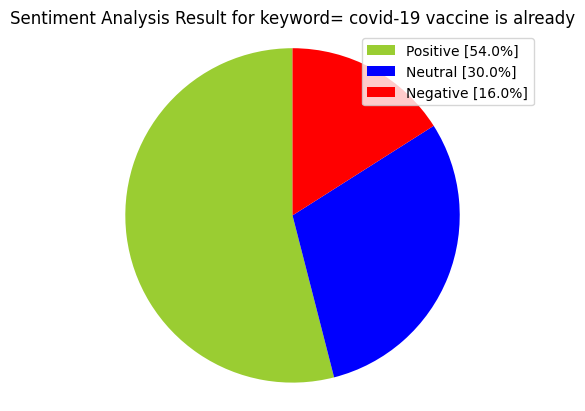

In [38]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()

## **Berikut Adalah Data yang Telah Didapatkan dari Hasil Sentimen**

In [39]:
tweet_list

,0
0,RT @CarlisleCC: Join the millions already vacc...
1,The Covid-19 vaccine has already saved thousan...
2,"If you have a brain, you already know this con..."
3,"""A taskforce led by EU Industry Commissioner T..."
4,This is a good example of why you should think...
...,...
95,Remember the pharmacist who deliberately remov...
96,RT @TeamQEH: The COVID-19 vaccine is safe and ...
97,"@Heachy_1979 Pandemic 2, they are kind of alre..."
98,RT @NHSNWCCG: The COVID-19 vaccine is safe and...


In [40]:
tweet_list.drop_duplicates(inplace = True)

## **Disini Kami Membuat Sebuah Dataframe Baru dan Memisahkan Hastag dan Juga Komentar-komentar Menjadi Dua Bagian**

In [41]:
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @CarlisleCC: Join the millions already vacc...,join the millions already vaccinated the nh...
1,The Covid-19 vaccine has already saved thousan...,the covid 19 vaccine has already saved thousan...
2,"If you have a brain, you already know this con...",if you have a brain you already know this con...
3,"""A taskforce led by EU Industry Commissioner T...",a taskforce led by eu industry commissioner t...
4,This is a good example of why you should think...,this is a good example of why you should think...
5,@RahulGandhi Already... https://t.co/vWmTZnJMAH,already
6,@MrsJroChicago @itthatkid253 @angrycyclista @R...,the cdc had already put the vaccines t...
7,"Moving on, a new Cleveland Clinic study says t...",moving on a new cleveland clinic study says t...
8,"RT @PastorACQ: ""The end of all flesh is come b...",the end of all flesh is come before me gen...
9,@RunninXC @KingTurnerIII @confidentdunce @_Mad...,madeinduval2 he is 100 correct thi...


# **Menganalisa Hasil Sentimen**

Selanjutnya, kami akan menganalisa data-data yang termasuk kedalam sentimen positif, negatif dan netral. secara umum kami dapat melihat statistik dari hasil sentimen data. Untuk mempermudah kami dalam menentukan kira-kira kata apa yang mewakili tiap sentimen, kami memperbesar dataframe menggunakan tools style.set_properties. 

In [42]:

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp


tw_list.style.set_properties(subset=['text'], **{'height': '40px'})



,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @CarlisleCC: Join the millions already vaccinated. The NHS will let you know when your #COVID19 vaccine is ready for you. For more i…,join the millions already vaccinated the nhs will let you know when your covid19 vaccine is ready for you for more i,0.350000,0.500000,positive,0.000000,0.802000,0.198000,0.571900
1,The Covid-19 vaccine has already saved thousands of lives. Don't delay in getting yours when it is offered to you t… https://t.co/hr0yDZ5uZn,the covid 19 vaccine has already saved thousands of lives don t delay in getting yours when it is offered to you t,0.000000,0.000000,positive,0.095000,0.788000,0.116000,0.128000
2,"If you have a brain, you already know this conspiracy theory is garbage, but here are the facts. https://t.co/c6VvD9WeYE",if you have a brain you already know this conspiracy theory is garbage but here are the facts,0.000000,0.000000,negative,0.135000,0.865000,0.000000,-0.361200
3,"""A taskforce led by EU Industry Commissioner Thierry Breton is already meeting regularly with a U.S. COVID-19 taskf… https://t.co/yuB856VxnC",a taskforce led by eu industry commissioner thierry breton is already meeting regularly with a u s covid 19 taskf,0.000000,0.076923,neutral,0.000000,1.000000,0.000000,0.000000
4,This is a good example of why you should think about getting the vaccine even if you already had COVID-19 Bottom l… https://t.co/2VpiTd5NoX,this is a good example of why you should think about getting the vaccine even if you already had covid 19 bottom l,0.700000,0.600000,positive,0.000000,0.873000,0.127000,0.440400
5,@RahulGandhi Already... https://t.co/vWmTZnJMAH,already,0.000000,0.000000,neutral,0.000000,1.000000,0.000000,0.000000
6,@MrsJroChicago @itthatkid253 @angrycyclista @RexChapman The CDC had already put the vaccines through Phase III tria… https://t.co/WP24AGtXtX,the cdc had already put the vaccines through phase iii tria,0.000000,0.000000,neutral,0.000000,1.000000,0.000000,0.000000
7,"Moving on, a new Cleveland Clinic study says that ‘No vaccine required for those who have already had COVID-19.’ N… https://t.co/5EkEAgBJI8",moving on a new cleveland clinic study says that no vaccine required for those who have already had covid 19 n,0.136364,0.454545,negative,0.109000,0.891000,0.000000,-0.296000
8,"RT @PastorACQ: ""The end of all flesh is come before me."" (Genesis 6:13) Sounds familiar with COVID-19? We thought we already had the vacc…",the end of all flesh is come before me genesis 6 13 sounds familiar with covid 19 we thought we already had the vacc,0.375000,0.500000,neutral,0.000000,1.000000,0.000000,0.000000
9,@RunninXC @KingTurnerIII @confidentdunce @_MadeInDuval2 @Sam4TR He is 100% correct- this vaccine was developed in i… https://t.co/Sr1YQ1AL8Q,madeinduval2 he is 100 correct this vaccine was developed in i,0.100000,0.300000,neutral,0.000000,1.000000,0.000000,0.000000


# **Membuat Dataframe Baru yang Berisi Sentimen Positif, Negatif dan Netral**

In [43]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

# **Menghitung Berapa Banyak Jumlah Sentimen dan Persentasenya**

In [44]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [45]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,36,45.57
neutral,25,31.65
negative,18,22.78


# **Membuat visualisasi dalam bentuk wordcloud** 

Dengan menggunakan wordcloud, kita dapat mengalisa kira-kira kata apa yang paling banyak muncul. kata yang paling banyak muncul dapat terlihat dengan mudah yaitu yang memliki tulisan paling besar.

In [46]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

## **Hasil Wordcloud untuk keseluruhan Sentimen (Positif, Negatif, dan Netral)**

Word Cloud Saved Successfully


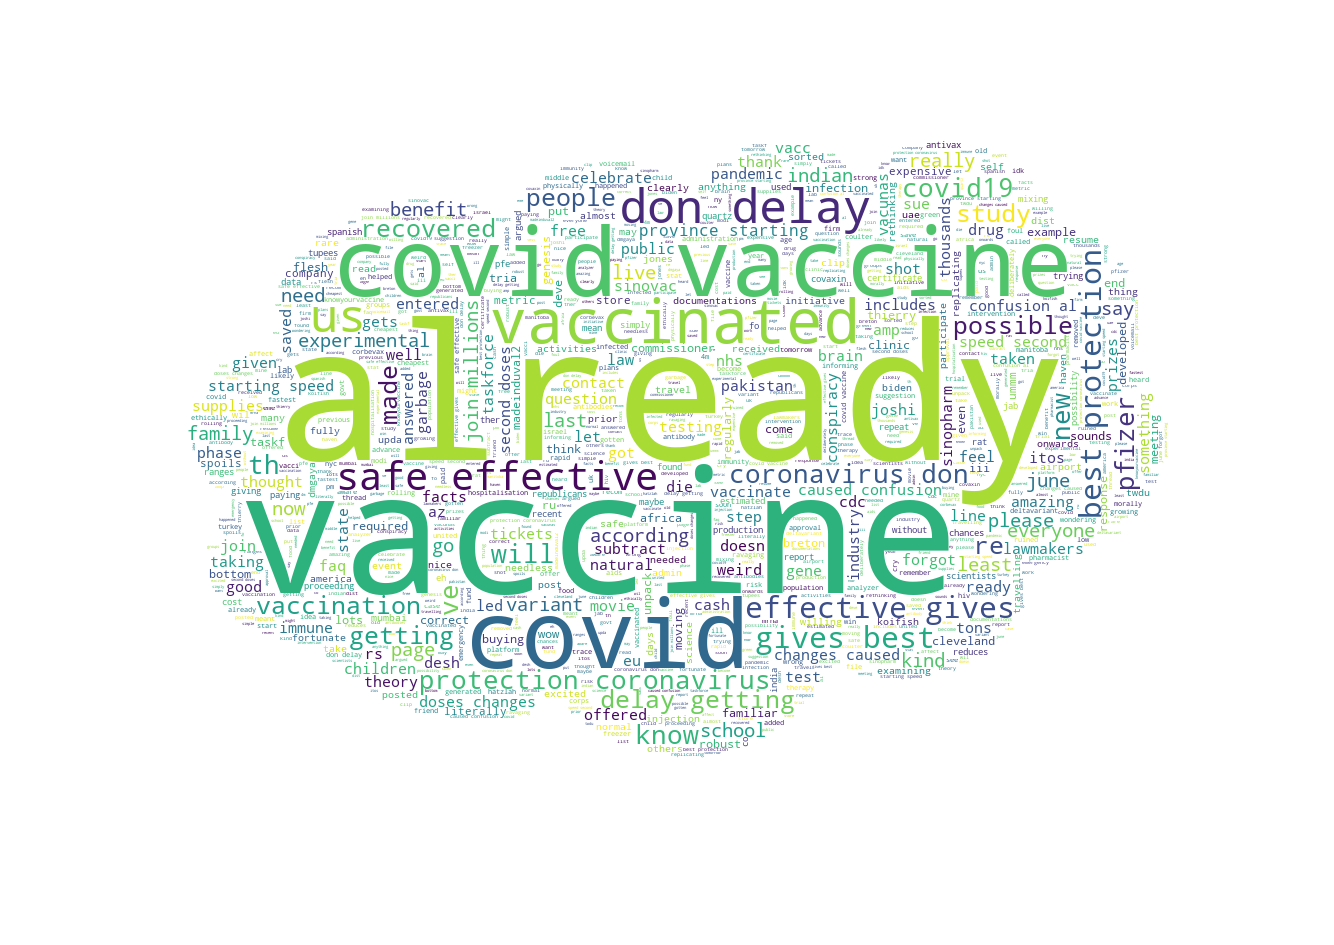

In [47]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

## **Hasil Wordcloud untuk Sentimen Positif**

Word Cloud Saved Successfully


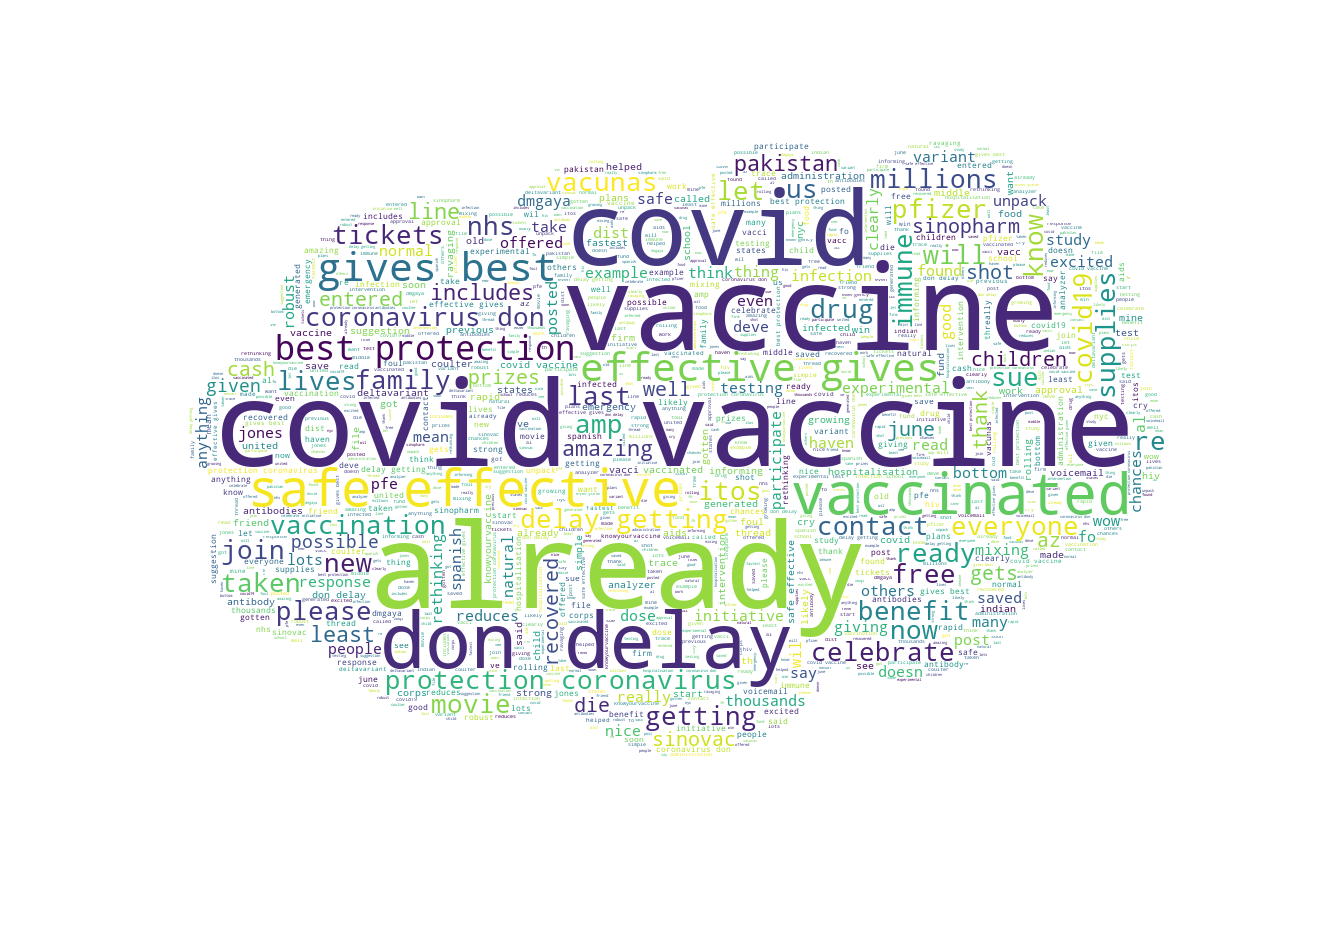

In [48]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

## **Hasil Wordcloud untuk Sentimen Negatif**

Word Cloud Saved Successfully


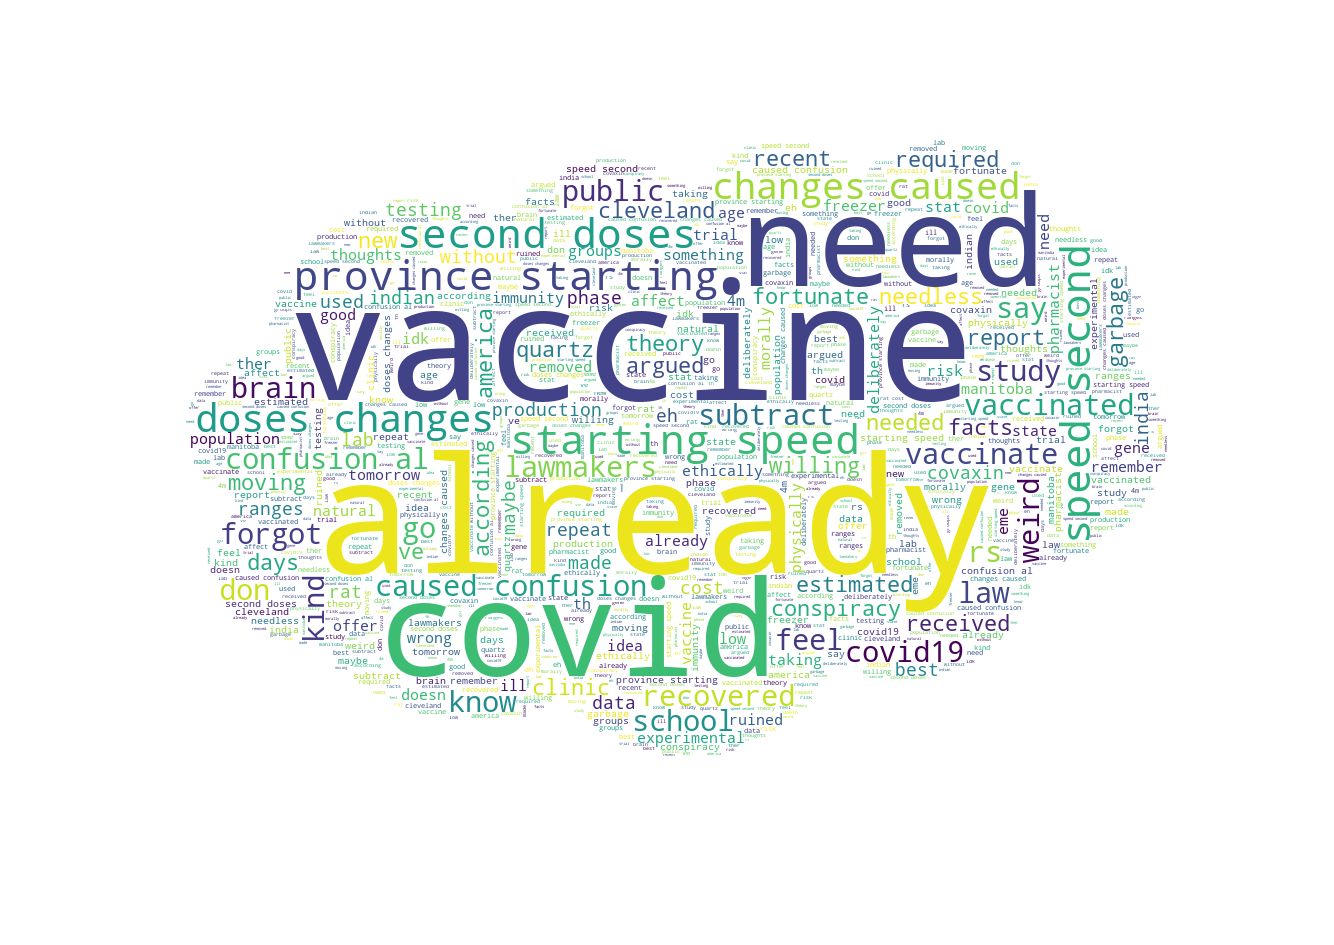

In [49]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

## **Hasil Wordcloud untuk Sentimen Netral**

Word Cloud Saved Successfully


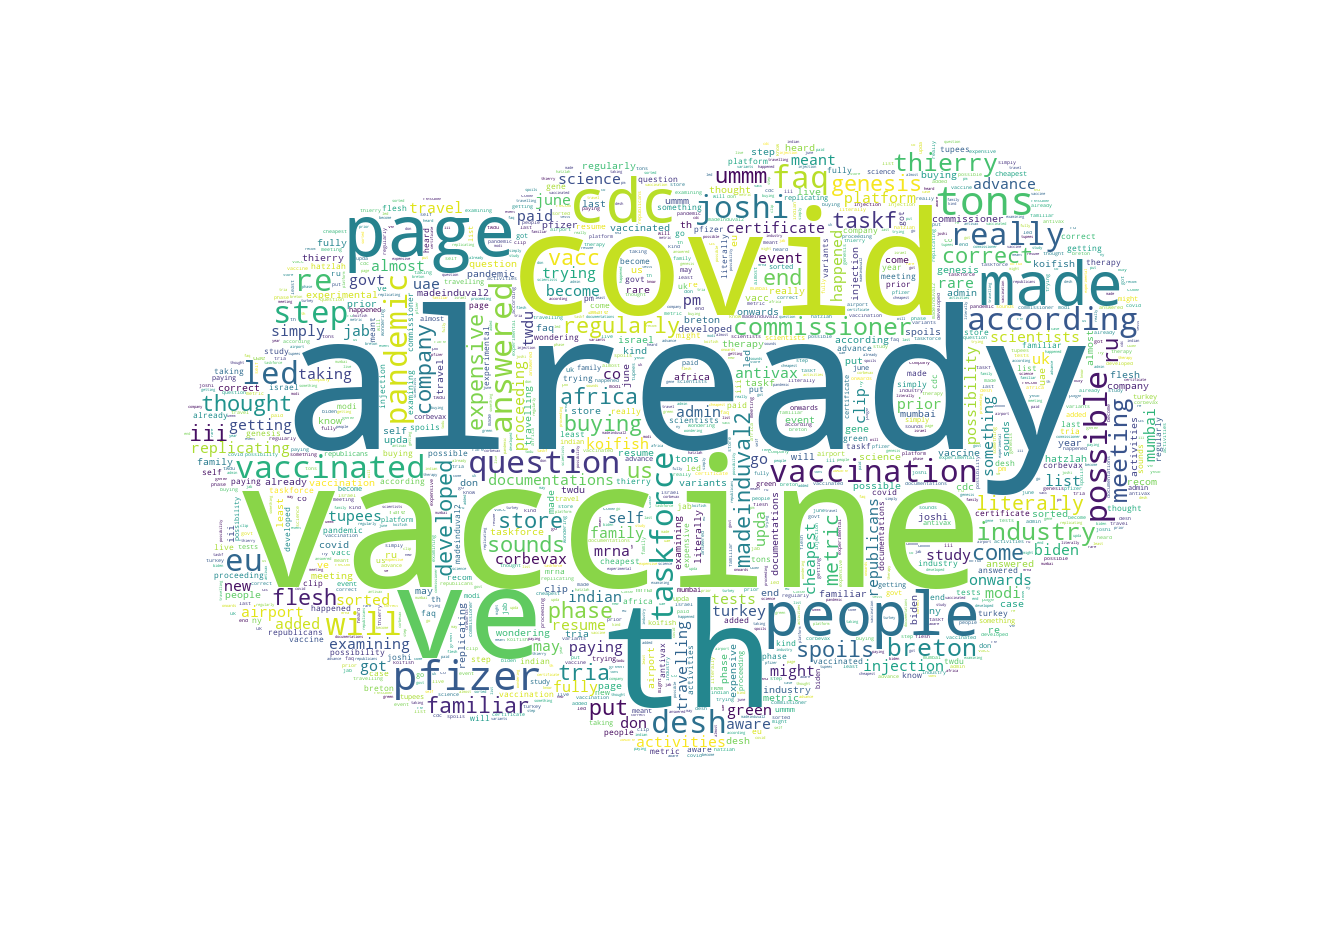

In [50]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

## **Menggunakan fungsi SentimentIntensityAnalyzer untuk melihat sentimen terhadap kata kunci**

In [51]:
SentimentIntensityAnalyzer().polarity_scores('safe')

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0}

In [52]:
SentimentIntensityAnalyzer().polarity_scores('domesticviolence')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [53]:
SentimentIntensityAnalyzer().polarity_scores('covid-19')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [54]:
SentimentIntensityAnalyzer().polarity_scores('already')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [55]:
SentimentIntensityAnalyzer().polarity_scores('vaccine')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

# **Kesimpulan:**

- Kami menggunakan kata kunci **covid-19 vaccine is already** dan hasilnya kami mendapatkan total number:100,
positive number:  59, negative number:  15, neutral number:  26

- Dari hasil yang kami dapat, kami menghitung dan menganilisa kira-kira kata apa yang mewakili tiap sentimen. kami dapatkan:
 -  Sentimen positif, yaitu : best, safe, thank, success, congratulating, protect, effective. 
 - Sentimen negative, yaitu : killed, fuck, dead, unimpressive, dan stings. 
 - Sentimen natural, yaitu : kebanyakan kata-kata tidak mengandung konotasi seperti sentimen positif dan negatif. secara umum, kalimat sentimen netral bersifat memberikan informasi.

- Dari hasil menggunakan SentimentInstensityAnalyzer, untuk kata kunci yang kami pakai, kami mendapatkan bahwa:
 - Covid-19 = Sentimen negatif
 - Vaccine = Sentimen Netral
 - Already = Sentimen Netral
 - Namun, dari ketiga kata kunci yang kami gunakan, jumlah tweet untuk sentimen positif memliki data yang lebih banyak karena banyak kata-kata pendukung yang bersamaan dengan kata kunci yang kami gunakan (safe, thanks, protect, dll).
